# Import modules and loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_E6oV3lV.csv')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Preprocessing

In [ ]:
def remove_pattern(input_text, pattern):
  r = re.findall(pattern, input_text)
  for word in r:
    input_text = re.sub(word, "", input_text)
  input_text = re.sub(r'\b\w{1,3}\b', '', input_text)
  input_text = re.sub("[^a-zA-Z#]", " ", input_text)
  return input_text

In [ ]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

In [ ]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda tokens: [porter_stemmer.stem(word) for word in tokens])

In [ ]:
df['clean_tweet'] = tokenized_tweet.apply(lambda tokens: ' '.join(tokens))

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# EDA

In [ ]:
!pip install wordcloud

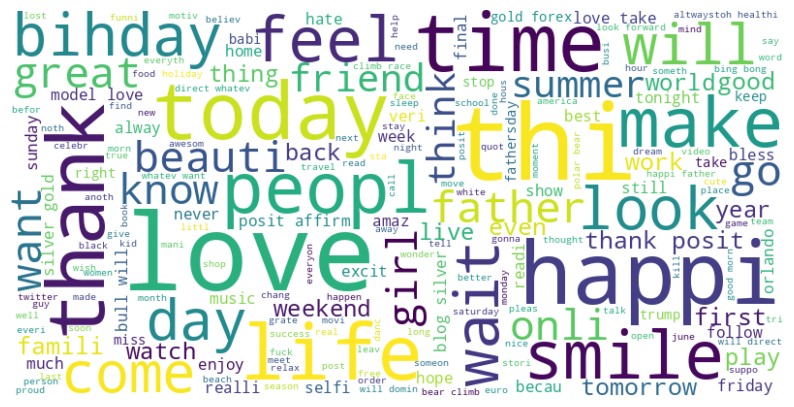

In [ ]:
from wordcloud import WordCloud
all_text = ' '.join(df['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#ht_positive = df['clean_tweet'].apply(lambda x: re.findall(r'#\w+', x))
ht_positive = df.apply(lambda row: re.findall(r'#(\w+)', row['clean_tweet']) if row['label'] == 0 else [], axis=1)
ht_negative = df.apply(lambda row: re.findall(r'#(\w+)', row['clean_tweet']) if row['label'] == 1 else [], axis=1)

In [ ]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

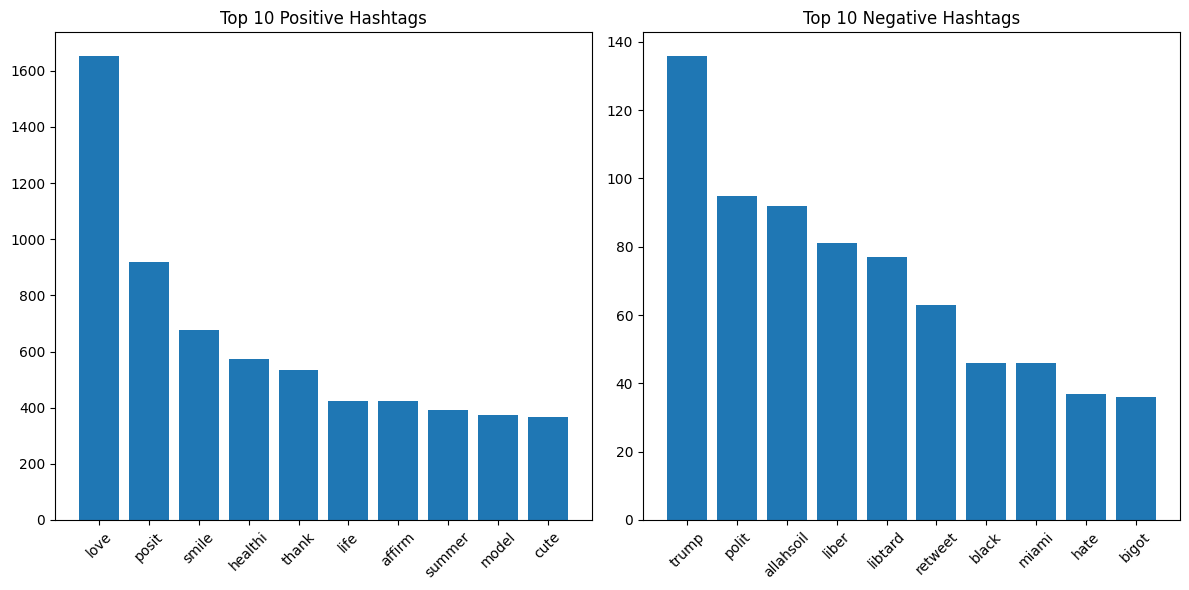

In [ ]:
# Create FreqDist for positive hashtags
freq_dist_positive = nltk.FreqDist(ht_positive)

# Create FreqDist for negative hashtags
freq_dist_negative = nltk.FreqDist(ht_negative)

# Select the top 10 hashtags for each category
top_positive_hashtags = dict(freq_dist_positive.most_common(10))
top_negative_hashtags = dict(freq_dist_negative.most_common(10))

# Plot bar charts for top 10 hashtags
plt.figure(figsize=(12, 6))

# Positive hashtags bar chart
plt.subplot(1, 2, 1)
plt.bar(top_positive_hashtags.keys(), top_positive_hashtags.values())
plt.title('Top 10 Positive Hashtags')
plt.xticks(rotation=45)

# Negative hashtags bar chart
plt.subplot(1, 2, 2)
plt.bar(top_negative_hashtags.keys(), top_negative_hashtags.values())
plt.title('Top 10 Negative Hashtags')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()